# Task 1

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### 1) Build colleration matrix and filter results with corellation > 95 or < -.95

In [2]:
df = pd.read_csv('sp500_27270.csv')

# compute correlations
corr = df.corr()
filtered_companies = [company for company in corr['SP500'].keys() if corr['SP500'][company] > 0.95 or corr['SP500'][company] < -0.95]

# select only the most corrleated companies
df_filtered = df.filter(filtered_companies)

print("Total number of companies staisfying the correlation threshold: ", len(filtered_companies))


Total number of companies staisfying the correlation threshold:  72


#### 2) Split dataset to training and testing

In [21]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2

X_data = np.array(df_filtered.drop(columns=['SP500']))
Y_data = np.array(df_filtered['SP500'])

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


print("Training chunk length: ", len(X_train))
print("Testing chunk length: ", len(X_test))

Training chunk length:  1008
Testing chunk length:  252


#### 3) Choose scoring metric 

In [14]:
# We chose MSE since it's a regression problem and the output range is large and error needs to be minimized
scoring_metric = "neg_mean_squared_log_error"

#### 4) Train the neural network with both the sgd and adam optimizer

In [32]:
print("\n-------------------------Adam-----------------------\n")

model = MLPRegressor(early_stopping=True, max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

model = MLPRegressor(early_stopping=True, max_iter=100000, hidden_layer_sizes=(1024, 1024), random_state=1, learning_rate_init=0.01, alpha=0.1, learning_rate='constant', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

model = MLPRegressor(early_stopping=True, max_iter=100000, hidden_layer_sizes=(1024,), random_state=1, learning_rate_init=0.01, alpha=0.1, learning_rate='constant', solver='adam')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)


-------------------------Adam-----------------------

MSLE:  0.022916126889398248
MSLE:  0.0001854633751186637
MSLE:  0.00019062252107250488


In [16]:
print("\n-------------------------SGD-----------------------\n")

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(1024,2), max_iter=10000, random_state=1, learning_rate_init=0.01, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)


model = MLPRegressor(early_stopping=True, max_iter=10000, hidden_layer_sizes=(1024,4,2), random_state=1, learning_rate_init=0.1, learning_rate='adaptive', solver='sgd')
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSLE)

print("\nConcluding SGD is worse in general")



-------------------------SGD-----------------------

MSLE:  0.018798115492017146
MSLE:  0.01786444006983937

Concluding SGD is worse in general


In [33]:
print("Finally using best params\n")

model = MLPRegressor(early_stopping=True, hidden_layer_sizes=(1024, 1024), random_state=1, learning_rate_init=0.01, alpha=0.1, learning_rate='constant', solver='adam', verbose=20)
model.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, Y_test)
print("\nScore: ", score)
MSLE = mean_squared_log_error(Y_test, y_predictions)
print("MSLE: ", MSE)

Finally using best params

Iteration 1, loss = 1740283.01773266
Validation score: -4.009707
Iteration 2, loss = 223186.02038350
Validation score: -0.225742
Iteration 3, loss = 49433.87912241
Validation score: 0.278246
Iteration 4, loss = 37393.03347118
Validation score: 0.344015
Iteration 5, loss = 32033.74474674
Validation score: 0.423799
Iteration 6, loss = 28474.22001631
Validation score: 0.536701
Iteration 7, loss = 23212.47817825
Validation score: 0.529690
Iteration 8, loss = 19242.82091961
Validation score: 0.714661
Iteration 9, loss = 11847.17191748
Validation score: 0.829987
Iteration 10, loss = 7088.68408679
Validation score: 0.912588
Iteration 11, loss = 3397.45760739
Validation score: 0.960615
Iteration 12, loss = 1445.96491372
Validation score: 0.977320
Iteration 13, loss = 982.88509052
Validation score: 0.979341
Iteration 14, loss = 955.31166899
Validation score: 0.977918
Iteration 15, loss = 1028.76625988
Validation score: 0.977944
Iteration 16, loss = 936.88285290
Valida

#### 5) Indicate which regularization technique you use to avoid overfitting.

We used early stopping to stop the the training when the validation error stops decreasing or the change is slow. Not stopping might cause the validation error to increase.

We also used alpha=0.1 to decrease the penalty for the bigger weights.

#### 6) Which optimizer performs better in this task? Why?

In [34]:
cross_score = cross_val_score(model, X_test, Y_test, scoring=scoring_metric)
print("Validation score: ", cross_score)

Iteration 1, loss = 2614164.88898711
Validation score: -45.887074
Iteration 2, loss = 2412920.08119258
Validation score: -30.587150
Iteration 3, loss = 1200236.68176821
Validation score: -42.806763
Iteration 4, loss = 1708999.75682736
Validation score: -33.678033
Iteration 5, loss = 1327000.60772516
Validation score: -13.308418
Iteration 6, loss = 496111.89395433
Validation score: -0.984356
Iteration 7, loss = 129338.22720838
Validation score: -6.233188
Iteration 8, loss = 431183.73643262
Validation score: -0.388294
Iteration 9, loss = 40947.80677231
Validation score: -7.611207
Iteration 10, loss = 279643.76448772
Validation score: -0.452298
Iteration 11, loss = 40621.50378374
Validation score: -2.057630
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2549446.28899474
Validation score: -36.589172
Iteration 2, loss = 2264316.28873432
Validation score: -22.177891
Iteration 3, loss = 1190300.99102445
Validation score: -30.5

In [35]:
cross_score.mean()

-0.01889642082276505

Adam is the best optimizer, this was concluded from trying different values with Adam and Sgd.

#### 7) Plotting predicted vs actual Y values

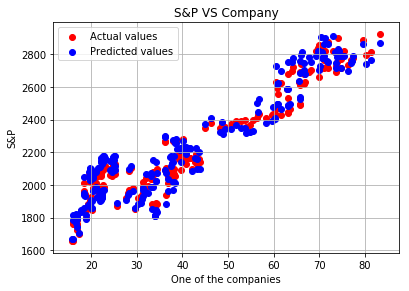

In [53]:
fig = plt.figure()
ax = fig.add_axes([1,0.1,0.8,0.8])
ax.scatter(X_test[:,1], Y_test, c='r', label='Actual values')
ax.scatter(X_test[:,1], y_predictions, c='b', label='Predicted values')

ax.grid()
ax.legend(loc='best')
ax.set_xlabel('One of the companies')
ax.set_ylabel('S&P')
ax.set_title('S&P VS Company')

plt.show()

#### 8) Comment on the points where the prediction and true values mismatch most

These points are outliers in the dataset and should be removed

# Task 2

#### 1) get most correlated company

In [37]:
max_corr = -100
max_company = ''

for i in corr['SP500'].keys():
    if corr['SP500'][i] > max_corr and i != 'SP500':
        max_corr = corr['SP500'][i]
        max_company = i
        
        
print('Company name:', max_company)
print('Colleration:', max_corr)

max_company_data = df[max_company]

Company name: APH
Colleration: 0.9883608178608217


#### 2) prepare input and output data set of days using shifting

In [38]:
X_data = []
Y_data = []

for iter in range(len(max_company_data) - 9):
    # get first 5 days for input
    X_data.append(list(max_company_data)[:5])
    # get following for days for output
    Y_data.append(list(max_company_data)[5:9])
    # shift data upwards by one step
    max_company_data = max_company_data.shift(-1)

#### 3) split dataset into test and train

In [39]:
TRAINING_PERCENTAGE = 0.8
TESTING_PERCENTAGE = 0.2
# VALIDATION_PERCENTAGE = 0.5 

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_filtered, test_size=TESTING_PERCENTAGE)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)

print("Training chunk length: ", len(X_train))
print("Testing chunk length: ", len(X_test))

Training chunk length:  1000
Testing chunk length:  251


#### 4) Create model and fit 

In [41]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(early_stopping=True)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.994549198467953


We chose MSE since it's a regression problem and the output range is acceptable, so no need for using mean squared log error

In [42]:
scoring_metric = "neg_mean_squared_error"

In [45]:
model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(100,2))
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(1024,2))
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)

model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(512, 128))
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)


Score:  0.9946417462315174
MSE:  1.3481863329581911


/home/ameniawy/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Score:  0.9899238725463174
MSE:  2.5352470989903395

Score:  0.9947258662881608
MSE:  1.327020946697187


#### 5) Evaluate model using best params

In [46]:
model = MLPRegressor(early_stopping=True, random_state=1, learning_rate_init=0.001, learning_rate='adaptive', solver='adam', hidden_layer_sizes=(100,2))

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print("Score: ", score)

Score:  0.9946417462315174


In [47]:
y_predictions = model.predict(X_test)
score = model.score(X_test, y_test)
print("\nScore: ", score)
MSE = mean_squared_error(y_test, y_predictions)
print("MSE: ", MSE)


Score:  0.9946417462315174
MSE:  1.3481863329581911


#### Try 3 instances

In [48]:
three_instances_x = X_test[:3]
three_instances_y = y_test[:3]
print(three_instances_x)
print(three_instances_y)

three_predictions_y = model.predict(three_instances_x)
print(three_predictions_y)

[[56.1063, 56.0676, 55.3417, 55.7966, 55.7772], [55.6847, 55.4794, 55.7629, 55.7336, 55.147], [87.6595, 89.5104, 89.99799999999999, 90.3662, 90.4657]]
[[55.2159, 55.3611, 55.8063, 56.0192], [54.58, 55.0004, 54.492, 54.1401], [90.2766, 90.4259, 90.605, 90.7543]]
[[56.02902018 55.98407708 56.0281861  56.03640665]
 [55.72515541 55.68253446 55.73518549 55.73348921]
 [90.19926461 89.89319041 88.97673176 90.10012106]]


#### Display 3 Instances

In [49]:
for idx, instance in enumerate(three_predictions_y):
    print("Instance", (str(idx+1)), ":\n")
    for idx2, day in enumerate(instance):
        print("Day ", (str(idx2+1)), ":")
        print("Predicted: ", day, " Actual: ", three_instances_y[idx][idx2])
    print("\n\n")
    

Instance 1 :

Day  1 :
Predicted:  56.02902017577302  Actual:  55.2159
Day  2 :
Predicted:  55.984077078396  Actual:  55.3611
Day  3 :
Predicted:  56.02818609809782  Actual:  55.8063
Day  4 :
Predicted:  56.036406647668535  Actual:  56.0192



Instance 2 :

Day  1 :
Predicted:  55.725155405573815  Actual:  54.58
Day  2 :
Predicted:  55.682534461420694  Actual:  55.0004
Day  3 :
Predicted:  55.73518549421704  Actual:  54.492
Day  4 :
Predicted:  55.733489214032815  Actual:  54.1401



Instance 3 :

Day  1 :
Predicted:  90.19926461317353  Actual:  90.2766
Day  2 :
Predicted:  89.89319041056886  Actual:  90.4259
Day  3 :
Predicted:  88.97673175657779  Actual:  90.605
Day  4 :
Predicted:  90.10012105884164  Actual:  90.7543





#### Values are close due to the 99% score of the model

# Task 3

## Some context on the TfidVectorizer and text handing in sklearn

* To represent a review to a neural network, each word has to be expressed as a number. 

* Each word in the review corpus is assigned a unique number. Assume the total number of unique words is feature_count. 

* Each review can then be represented as a vector of length feature_count. 

* Entries in this vector can be either 0 or 1, if the word is present in this review or absent respectively. 

* A more advanced approach will replace the binary numbers above with ratios that emphaise how rare ( and hence meanigful and representative ) the word is across all reviews. For example, a word like "product" will have little use for the neural network in determing whetehr this is a rating-1 or rating-5 review, as this particular word occurs in most reviews, both positive and negative ones. 

* Here we limit the number of feature_count to 40,000 to cut down the training time. 

more info available from 
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

#### Read dataset and clean

In [50]:
import pandas as pd

reviews = pd.read_json('reviews_digital.json', lines=True)

In [3]:
# reviews.loc[reviews['overall'] == 1, 'overall'] = 1
# reviews.loc[reviews['overall'] == 2, 'overall'] = 1
# reviews.loc[reviews['overall'] == 3, 'overall'] = 1
# reviews.loc[reviews['overall'] == 4, 'overall'] = 5
# reviews.loc[reviews['overall'] == 5, 'overall'] = 5

# balanced_data = reviews

In [51]:
print(reviews.groupby('overall').count()['asin'])
print()
frames = []

for i in range(1,6):
    frames.append(reviews[(reviews['overall'] == i)][:2700])

balanced_data = pd.concat(frames)

print(len(balanced_data))

overall
1     2791
2     3010
3     6789
4    16536
5    35580
Name: asin, dtype: int64

13500


#### Split data

In [52]:
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

TESTING_PERCENTAGE = 0.2

X_data = np.array(balanced_data['reviewText'])

# stop_words = set(stopwords.words('english')) 
# X_data_new = []
# for text in X_data:
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w in stop_words]
#     X_data_new.append(' '.join(filtered_sentence))
  

Y_data = np.array(balanced_data['overall'])


X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=TESTING_PERCENTAGE)


#### Calculate tfidf scores

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#You need to define X_train and X_test
tfidf_vectorizer = TfidfVectorizer(max_features=45000)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)

In [54]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(early_stopping=True, activation='relu', alpha=0.001, hidden_layer_sizes=(512,), solver='adam', verbose=20)

model.fit(X_train_transformed, y_train)


Iteration 1, loss = 1.40389922
Validation score: 0.593519
Iteration 2, loss = 0.81421622
Validation score: 0.626852
Iteration 3, loss = 0.45754095
Validation score: 0.625000
Iteration 4, loss = 0.25781869
Validation score: 0.630556
Iteration 5, loss = 0.15354026
Validation score: 0.621296
Iteration 6, loss = 0.10225972
Validation score: 0.619444
Iteration 7, loss = 0.07601860
Validation score: 0.603704
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(512,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=20, warm_start=False)

In [55]:
print(model.score(X_test_transformed, y_test))

0.6185185185185185


In [56]:
from sklearn import model_selection

# Since this is a classification problem then accuracy can be used
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train_transformed, y_train, cv=3, scoring=scoring, verbose=20)

[CV]  ................................................................
Iteration 1, loss = 1.49341371
Validation score: 0.544444
Iteration 2, loss = 0.99361245
Validation score: 0.572222
Iteration 3, loss = 0.57851870
Validation score: 0.587500
Iteration 4, loss = 0.32500014
Validation score: 0.583333
Iteration 5, loss = 0.18831607
Validation score: 0.575000
Iteration 6, loss = 0.12005095
Validation score: 0.573611
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ....................... , score=0.6013325930038868, total= 2.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  ................................................................
Iteration 1, loss = 1.48367417
Validation score: 0.540278
Iteration 2, loss = 0.96780020
Validation score: 0.552778
Iteration 3, loss = 0.56460500
Validation score: 0.558333
Iteration 4, loss = 0.31865246
Validation score: 0.568056
Iteration 5, loss = 0.18626420
Validation score: 0.563889
Iteration 6, loss = 0.11827322
Validation score: 0.558333
Iteration 7, loss = 0.08317972
Validation score: 0.561111
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ....................... , score=0.6011111111111112, total= 2.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.3min remaining:    0.0s


Iteration 1, loss = 1.49309255
Validation score: 0.579750
Iteration 2, loss = 0.99480978
Validation score: 0.603329
Iteration 3, loss = 0.59129274
Validation score: 0.606103
Iteration 4, loss = 0.33785802
Validation score: 0.610264
Iteration 5, loss = 0.19726409
Validation score: 0.596394
Iteration 6, loss = 0.12501179
Validation score: 0.603329
Iteration 7, loss = 0.08794290
Validation score: 0.601942
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV] ....................... , score=0.5928293496386882, total= 2.3min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.6min finished


In [57]:
print("Accuracy:", results.mean())
print("Standard Deviation:", results.std())

Accuracy: 0.5984243512512287
Standard Deviation: 0.003957296706966779


##### Trying 2 or 1 hidden layers

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['adam'],
    'activation': ['relu'],
    'hidden_layer_sizes': [(512, 512), (512,)],
    'alpha': [0.01],
    'early_stopping': [True]
}

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=20, scoring=scoring)

grid_search.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam 
Iteration 1, loss = 1.41537034
Validation score: 0.550000
Iteration 2, loss = 0.66286980
Validation score: 0.648611
Iteration 3, loss = 0.23295364
Validation score: 0.619444
Iteration 4, loss = 0.10017237
Validation score: 0.609722
Iteration 5, loss = 0.07216896
Validation score: 0.609722
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam, score=0.5907828983897835, total= 1.7min
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.7min remaining:    0.0s


Iteration 1, loss = 1.42406351
Validation score: 0.573611
Iteration 2, loss = 0.66289352
Validation score: 0.616667
Iteration 3, loss = 0.23946757
Validation score: 0.602778
Iteration 4, loss = 0.10339561
Validation score: 0.586111
Iteration 5, loss = 0.07439467
Validation score: 0.583333
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam, score=0.5925, total= 1.8min
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min remaining:    0.0s


Iteration 1, loss = 1.40855826
Validation score: 0.556172
Iteration 2, loss = 0.67811471
Validation score: 0.590846
Iteration 3, loss = 0.25672600
Validation score: 0.592233
Iteration 4, loss = 0.11087798
Validation score: 0.595007
Iteration 5, loss = 0.07650946
Validation score: 0.581137
Iteration 6, loss = 0.06563774
Validation score: 0.579750
Iteration 7, loss = 0.05890552
Validation score: 0.589459
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512, 512), solver=adam, score=0.5778210116731517, total= 2.5min
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.0min remaining:    0.0s


Iteration 1, loss = 1.50626534
Validation score: 0.556944
Iteration 2, loss = 1.03643749
Validation score: 0.575000
Iteration 3, loss = 0.67189623
Validation score: 0.579167
Iteration 4, loss = 0.45199304
Validation score: 0.581944
Iteration 5, loss = 0.32726002
Validation score: 0.573611
Iteration 6, loss = 0.25917963
Validation score: 0.573611
Iteration 7, loss = 0.21864504
Validation score: 0.569444
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam, score=0.5968906163242643, total= 2.5min
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.5min remaining:    0.0s


Iteration 1, loss = 1.49444906
Validation score: 0.547222
Iteration 2, loss = 1.00885102
Validation score: 0.537500
Iteration 3, loss = 0.65427540
Validation score: 0.593056
Iteration 4, loss = 0.44209593
Validation score: 0.594444
Iteration 5, loss = 0.32144294
Validation score: 0.584722
Iteration 6, loss = 0.25426683
Validation score: 0.586111
Iteration 7, loss = 0.21568753
Validation score: 0.566667
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam, score=0.6, total= 2.5min
[CV] activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.0min remaining:    0.0s


Iteration 1, loss = 1.49954506
Validation score: 0.554785
Iteration 2, loss = 1.02269029
Validation score: 0.588072
Iteration 3, loss = 0.66029255
Validation score: 0.592233
Iteration 4, loss = 0.44301408
Validation score: 0.581137
Iteration 5, loss = 0.32155080
Validation score: 0.575589
Iteration 6, loss = 0.25382864
Validation score: 0.565881
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[CV]  activation=relu, alpha=0.01, early_stopping=True, hidden_layer_sizes=(512,), solver=adam, score=0.6089494163424124, total= 2.1min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 13.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 13.1min finished


Iteration 1, loss = 1.42514045
Validation score: 0.580556
Iteration 2, loss = 0.89291472
Validation score: 0.603704
Iteration 3, loss = 0.58854469
Validation score: 0.613889
Iteration 4, loss = 0.41398080
Validation score: 0.605556
Iteration 5, loss = 0.31529266
Validation score: 0.594444
Iteration 6, loss = 0.26063472
Validation score: 0.594444
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(512,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=20, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'solver': ['adam'], 'activation': ['relu'], 'hidden_layer_sizes': [(512, 512), (512,)], 'alpha': [0.01], 'early_stopping': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=20)

In [62]:
print(grid_search.best_params_)

{'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (512,), 'solver': 'adam'}


#### Try 3 hidden layers

In [64]:
model_3 = MLPClassifier(early_stopping=True, activation='relu', alpha=0.001, hidden_layer_sizes=(512, 512, 512), solver='adam', verbose=20)
model_3.fit(X_train_transformed, y_train)
print(model_3.score(X_test_transformed, y_test))

Iteration 1, loss = 1.26137762
Validation score: 0.547222
Iteration 2, loss = 0.55693519
Validation score: 0.599074
Iteration 3, loss = 0.16746110
Validation score: 0.587963
Iteration 4, loss = 0.03514302
Validation score: 0.574074
Iteration 5, loss = 0.01506884
Validation score: 0.572222
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
0.6044444444444445


1 hidden layer is enough

#### Confusion Matrix

Confusion matrix, without normalization
[[347 138  27   9  17]
 [103 285 121  17  13]
 [ 17  82 307  86  38]
 [  9  23 110 304  86]
 [ 11   8  30  85 427]]
Normalized confusion matrix
[[0.64 0.26 0.05 0.02 0.03]
 [0.19 0.53 0.22 0.03 0.02]
 [0.03 0.15 0.58 0.16 0.07]
 [0.02 0.04 0.21 0.57 0.16]
 [0.02 0.01 0.05 0.15 0.76]]


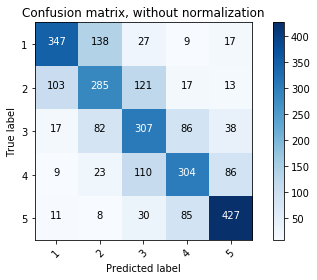

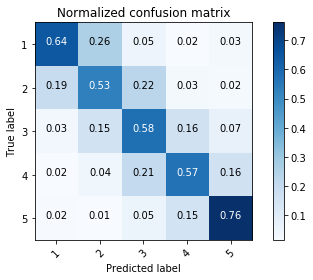

In [58]:
from sklearn.metrics import confusion_matrix
import itertools
classes = [1, 2, 3, 4, 5]
y_pred = model.predict(X_test_transformed)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # end of the function


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### 8) What is the activation function used at the output layer? Did you have to select this function yourself? How does SKLearn determines it?

SKlearn uses **softmax** at the output layer (we did not have to specify this),
which relates the multiple *y* output values and then selects the maximum weight.